In [1]:
import matplotlib.pyplot as plt
from subprocess import check_output

input_folder = "../dataset"

import os
###run once
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import graphviz
import pydotplus 
from sklearn import tree
from pandas import DataFrame,Series
from sklearn.tree import ExtraTreeRegressor, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#print(os.environ["PATH"])

C:\Users\Kelvin\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
movie_file = pd.read_csv(input_folder+"/movie_metadata_cleaned_filled_values.csv")
movie_data= DataFrame(movie_file)
movie_data.fillna(movie_data.mean())
movie_data = movie_data.dropna()

#movie_data.head(10)
#len(movie_data)

In [3]:
drop_predictors = ['gross', 'worldwide_gross','color', 'movie_title', 'director_name',
       'actor_1_name', 'actor_2_name','actor_3_name', 
       'content_rating', 'genres', 'plot_keywords', 'movie_imdb_link', 'country', 'language', 'release_date','title_year','aspect_ratio']

#define predictors and predicted values
X = movie_data.drop(drop_predictors, axis=1)
y = movie_data.worldwide_gross

from sklearn import preprocessing

####standardize data to address different scales.
standardized_X = preprocessing.scale(X)
standardized_y = preprocessing.scale(y)
#print(standardized_y)

#### split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(standardized_X, standardized_y, train_size=0.7, random_state=0)

###cannot prune tree; using 'max_depth' instead, that is if we want to indicate how far tree should go
reg_model = ExtraTreeRegressor()

##Train the model using the training sets 
reg_model.fit(X_train, y_train)

C:\Users\Kelvin\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
          max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')

In [ ]:
####visualize tree
tree.export_graphviz(reg_model, out_file='imdb_tree.dot') 
from IPython.display import Image  
dot_data = tree.export_graphviz(reg_model, out_file=None, 
                                feature_names = X.columns, filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_pdf("imdb_tree.pdf") 
Image(graph.create_png())  

###Resultant tree graph scaled by by 0.15-0.17 to fit

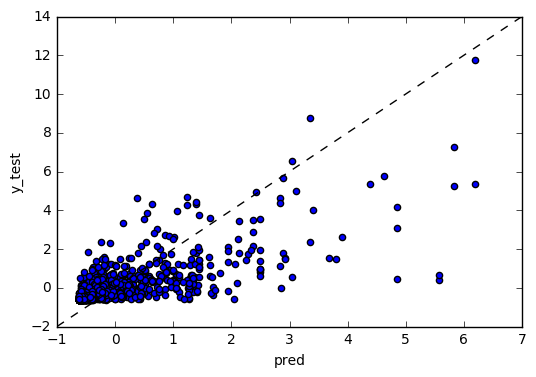

In [4]:
pred = reg_model.predict(X_test)
plt.scatter(pred, y_test, label='worldwide_gross')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
plt.show()
#mean_squared_error(y_test, pred)
#r2_score(y_test, pred, multioutput='variance_weighted')  

#score = cross_val_score(reg_model, standardized_X, standardized_y, cv=10, scoring= 'mean_squared_error')

#mse_scores = -score
#print mse_scores

#rmse_scores = np.sqrt(mse_scores)
#print rmse_scores

#print rmse_scores.mean()

In [5]:
mean_squared_error(y_test, pred)

0.55665044663087826

In [6]:
r2_score(y_test, pred, multioutput='variance_weighted')

0.51751698529667001